In [55]:
import psycopg2
import postgis
import math
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
database = 'solar'
database_user = 'solar'
database_password = 'baba'

In [3]:
connection = psycopg2.connect(dbname=database, user=database_user, password=database_password)
cursor = connection.cursor()
postgis.register(cursor)

cursor.execute("""
    select id_osm, commune, geom, merc, area, convex_hull_carto
    from buildings
    where id_osm=82089709
    ;
    """)

data = cursor.fetchall()

cursor.close()
connection.close()


In [4]:
example = data[0]

In [5]:
id_osm, commune, geom, merc, area, convex_hull_carto = example

In [6]:
id_osm

82089709

In [7]:
geom

<Polygon POLYGON((-3.85574077766025 48.530503686336, -3.85571292988645 48.5305157624684, -3.85573781321982 48.5305416993737, -3.85562471532554 48.5305903607793, -3.85547918824952 48.5304405691635, -3.85553838722674 48.5304142752758, -3.85563064420642 48.5305073151249, -3.85571077392976 48.5304728713644, -3.85574077766025 48.530503686336))>

In [81]:
rotation_90_degrees = np.array([[0, 1], [-1, 0]])

def get_angle_ratio(convex_hull_carto):
    assert convex_hull_carto.geojson['type'] == 'Polygon'
    assert len(convex_hull_carto.geojson['coordinates']) == 1
    
    points = np.array(convex_hull_carto.geojson['coordinates'][0])
    delta = points[1:] - points[:-1]
    distance = np.sqrt(np.power(delta[:,0:1], 2) + np.power(delta[:,1:2], 2))
    tangent = delta/distance
    normal = np.dot(tangent, rotation_90_degrees)
    proj_tangent = np.dot(points, tangent.T)
    proj_normal = np.dot(points, normal.T)
    
    tangent_min = proj_tangent.min(0)
    tangent_max = proj_tangent.max(0)
    normal_min = proj_normal.min(0)
    normal_max = proj_normal.max(0)
    
    length_tangent = tangent_max - tangent_min
    length_normal = normal_max - normal_min
    surface = length_tangent * length_normal
    
    i_orientation = surface.argmin()

    #t_min = tangent_min[i_orientation]
    #t_max = tangent_max[i_orientation]
    #n_min = normal_min[i_orientation]
    #n_max = normal_max[i_orientation]
    #rectangle_local = np.array([[t_min, n_min], [t_min, n_max], [t_max, n_min], [t_max, n_max]])
    #rotation_inverse = np.array([tangent[i_orientation], normal[i_orientation]])
    #rectangle = np.dot(rectangle_local, rotation_inverse)

    a, b = tangent[i_orientation]
    angle = math.acos(a)
    if b<0:
        angle *= -1
    angle += 2*math.pi
    while angle > math.pi/4.:
        angle -= math.pi/2.
    #angle_degrees = angle * 180. / math.pi
    #angle_degrees
    
    return angle

In [83]:
get_angle_ratio(convex_hull_carto)

0.571698693309246

(-429223.57097747928,
 -429188.04930273962,
 6195547.2443210306,
 6195586.8486516913)

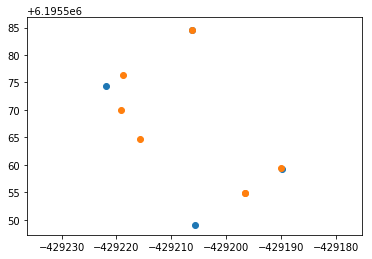

In [47]:
plt.scatter(rectangle[:,0], rectangle[:,1])
plt.scatter(points[:,0], points[:,1])
plt.axis('equal')

In [53]:

x_min, x_max, y_min, y_max

(-429221.94739532674,
 -429189.89800180378,
 6195549.0583147882,
 6195584.5100000007)

32.75592227976383